# Homework 5 - Chao Chen

## Question 1 - Generative Models for Text

### (c) 
#### i.

In [83]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [84]:
filenames = ['books/1.txt']
with open('result.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            content = infile.read().replace('\n', '')
            outfile.write(content)

In [85]:
result_file = 'result.txt'
text = ''
with open(result_file, 'r') as myfile:
    text = myfile.read()
print(len(text))

241115


#### ii.

In [86]:
import pandas as pd
asc_array = [ord(c) for c in text if ord(c) < 256]

#### iii.

In [87]:
W = 100

#### iv. 

In [88]:
import numpy as np
train_x = []
train_y = []
for i in range(0, len(asc_array)-W):
    x = []
    y = 0
    for j in range(i, i+W):
        if j == i+W-1:
            y = asc_array[j]
        else:
            x.append(asc_array[j])
    train_x.append(x)
    train_y.append(y)
# train_x = np.array(train_x)
train_x = np.reshape(train_x, (len(train_x), len(train_x[0]), 1))
train_x = train_x/float(256)

In [30]:
train_y[:10]

[114, 101, 103, 97, 114, 100, 32, 116, 111, 32]

#### v.

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(n_values=256)
train_y = np.reshape(train_y,(len(train_y), 1))
enc.fit(train_y)
one_hot_y = enc.transform(train_y).toarray()
one_hot_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### vi.

In [32]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(256, input_shape=(train_x.shape[1], train_x.shape[2])))

#### vii.

In [34]:
model.add(Dense(256, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

#### viii. & ix. & x.

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath='lstm-epoch-30.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [36]:
model.fit(train_x, one_hot_y, epochs=30, batch_size=128, callbacks=callbacks_list)

Epoch 1/30
241015/241015 [==============================] - 1206s 5ms/step - loss: 3.0158

Epoch 00001: loss improved from inf to 3.01585, saving model to lstm-epoch-30.hdf5
Epoch 2/30
241015/241015 [==============================] - 1358s 6ms/step - loss: 2.8738

Epoch 00002: loss improved from 3.01585 to 2.87381, saving model to lstm-epoch-30.hdf5
Epoch 3/30
241015/241015 [==============================] - 1304s 5ms/step - loss: 2.8245

Epoch 00003: loss improved from 2.87381 to 2.82455, saving model to lstm-epoch-30.hdf5
Epoch 4/30
241015/241015 [==============================] - 1254s 5ms/step - loss: 2.7958

Epoch 00004: loss improved from 2.82455 to 2.79579, saving model to lstm-epoch-30.hdf5
Epoch 5/30
241015/241015 [==============================] - 1205s 5ms/step - loss: 2.7673

Epoch 00005: loss improved from 2.79579 to 2.76729, saving model to lstm-epoch-30.hdf5
Epoch 6/30
241015/241015 [==============================] - 1237s 5ms/step - loss: 2.7443

Epoch 00006: loss impro

In [39]:
model.fit(train_x, one_hot_y, epochs=5, batch_size=128, callbacks=callbacks_list)

Epoch 1/5
241015/241015 [==============================] - 1041s 4ms/step - loss: 2.3481

Epoch 00001: loss improved from 2.35906 to 2.34809, saving model to lstm-epoch-30.hdf5
Epoch 2/5
241015/241015 [==============================] - 920s 4ms/step - loss: 2.3398

Epoch 00002: loss improved from 2.34809 to 2.33983, saving model to lstm-epoch-30.hdf5
Epoch 3/5
241015/241015 [==============================] - 878s 4ms/step - loss: 2.3302

Epoch 00003: loss improved from 2.33983 to 2.33016, saving model to lstm-epoch-30.hdf5
Epoch 4/5
241015/241015 [==============================] - 977s 4ms/step - loss: 2.3215

Epoch 00004: loss improved from 2.33016 to 2.32145, saving model to lstm-epoch-30.hdf5
Epoch 5/5
241015/241015 [==============================] - 1079s 4ms/step - loss: 2.3127

Epoch 00005: loss improved from 2.32145 to 2.31274, saving model to lstm-epoch-30.hdf5


In [41]:
model.fit(train_x, one_hot_y, epochs=5, batch_size=128, callbacks=callbacks_list)

Epoch 1/5
241015/241015 [==============================] - 1256s 5ms/step - loss: 2.3044

Epoch 00001: loss improved from 2.31274 to 2.30439, saving model to lstm-epoch-30.hdf5
Epoch 2/5
241015/241015 [==============================] - 1108s 5ms/step - loss: 2.2956

Epoch 00002: loss improved from 2.30439 to 2.29557, saving model to lstm-epoch-30.hdf5
Epoch 3/5
241015/241015 [==============================] - 1087s 5ms/step - loss: 2.2868

Epoch 00003: loss improved from 2.29557 to 2.28679, saving model to lstm-epoch-30.hdf5
Epoch 4/5
241015/241015 [==============================] - 1120s 5ms/step - loss: 2.2795

Epoch 00004: loss improved from 2.28679 to 2.27948, saving model to lstm-epoch-30.hdf5
Epoch 5/5
241015/241015 [==============================] - 1060s 4ms/step - loss: 2.2718

Epoch 00005: loss improved from 2.27948 to 2.27184, saving model to lstm-epoch-30.hdf5


In [43]:
model.fit(train_x, one_hot_y, epochs=10, batch_size=128, callbacks=callbacks_list)

Epoch 1/10
241015/241015 [==============================] - 908s 4ms/step - loss: 2.2654

Epoch 00001: loss improved from 2.27184 to 2.26540, saving model to lstm-epoch-30.hdf5
Epoch 2/10
241015/241015 [==============================] - 947s 4ms/step - loss: 2.2574

Epoch 00002: loss improved from 2.26540 to 2.25738, saving model to lstm-epoch-30.hdf5
Epoch 3/10
241015/241015 [==============================] - 1138s 5ms/step - loss: 2.2510

Epoch 00003: loss improved from 2.25738 to 2.25095, saving model to lstm-epoch-30.hdf5
Epoch 4/10
241015/241015 [==============================] - 1136s 5ms/step - loss: 2.2426

Epoch 00004: loss improved from 2.25095 to 2.24260, saving model to lstm-epoch-30.hdf5
Epoch 5/10
241015/241015 [==============================] - 1268s 5ms/step - loss: 2.2359

Epoch 00005: loss improved from 2.24260 to 2.23591, saving model to lstm-epoch-30.hdf5
Epoch 6/10
241015/241015 [==============================] - 1249s 5ms/step - loss: 2.2308

Epoch 00006: loss imp

In [78]:
from keras.models import load_model
## total 50 epoches
loaded_model = load_model(filepath)
new_checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

#### xi.

In [80]:
def generate_text(init_text, model, length):
    text_asc_array = [ord(c) for c in init_text if ord(c) < 256]
    text_asc_array = np.array(text_asc_array)
    text_asc_array = text_asc_array/float(256)
    input_x = text_asc_array[-99:]
    input_x = input_x.tolist()
    output_text = init_text
    for i in range(length):
        pred_x = np.reshape(input_x, (1, len(train_x[0]), 1))
        prediction = model.predict(pred_x, verbose=0)
        index = np.argmax(prediction)
        new_char = chr(index)
        new_x = ord(new_char)/float(256)
        input_x.append(new_x)
        input_x = input_x[1:]
        output_text += new_char
    return output_text
initial_text = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object.'
generate_text(initial_text, model, 1000)

'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object. and the penson oe the serse df a fene of the serse dn a penseni of she pense-data and she serse-data an anluer oo aelnefs and the sense-data and she penset are soeee and she serse-data an anpuei tores of she sersent of the serse-data an anluer oo a celtein aroseestsnis of the serse df a penseni oo the serse danat an anpuei tores. Tne fane th thall teese is a sers of the frsere to be ir toee as ane foor the sane oo ae irrel to be iroen te shelld the pane ofnessons of the serse dn a penseni of she pense-data and she serse-data an anluer oo aelnefs and the sense-data and she penset are soeee and she serse-data an anpuei tores of she sersent of the serse-data an anluer oo a celtein aroseestsnis of the serse df a penseni oo the serse danat an anpuei tores. Tne fane th thall teese is a sers of the frsere to be ir toee as ane foor the sane 

## Question 2 - CNNs for Image Colorization

### (a)

In [1]:
import numpy as np
import pandas as pd
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
batches_dict = unpickle('pictures/batches.meta')
batches_dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [6]:
batches_dict[b'label_names'][2]

b'bird'

In [7]:
test_dict = unpickle('pictures/test_batch')

In [8]:
train_batch_files = ['pictures/data_batch_1','pictures/data_batch_2','pictures/data_batch_3','pictures/data_batch_4','pictures/data_batch_5']
train_batch_dict_list = []
for file_name in train_batch_files:
    train_batch_dict_list.append(unpickle(file_name))

### (b)

In [9]:
def extract_bird_class(all_dict):
    labels = all_dict[b'labels']
    bird_class_indices = [index for index in range(len(labels)) if labels[index] == 2]
    all_data = all_dict[b'data']
    all_filenames = all_dict[b'filenames']
    bird_data = [all_data[i] for i in bird_class_indices]
    bird_files = [all_filenames[i] for i in bird_class_indices]
    return bird_data, bird_files

In [10]:
bird_train_data = []
bird_test_data = []
bird_train_files = []
bird_test_files = []
data, files = extract_bird_class(test_dict)
bird_test_data = data
bird_test_files = files
for train_dict in train_batch_dict_list:
    data, files = extract_bird_class(train_dict)
    bird_train_data += data
    bird_train_files += files

In [11]:
bird_train_files[:10]

[b'cassowary_s_001300.png',
 b'passerine_s_000343.png',
 b'accentor_s_000677.png',
 b'cassowary_s_001246.png',
 b'ostrich_s_001368.png',
 b'ostrich_s_001150.png',
 b'accentor_s_000759.png',
 b'emu_novaehollandiae_s_000795.png',
 b'songbird_s_001052.png',
 b'emu_s_000692.png']

In [12]:
bird_train_data[:10]

[array([164, 105, 118, ...,  29,  26,  44], dtype=uint8),
 array([17, 17, 17, ..., 20, 18, 16], dtype=uint8),
 array([197, 198, 201, ...,  61,  63,  57], dtype=uint8),
 array([73, 71, 77, ..., 55, 38, 29], dtype=uint8),
 array([145, 145, 148, ..., 160, 150, 167], dtype=uint8),
 array([127, 148, 192, ..., 103, 107, 117], dtype=uint8),
 array([ 77,  76,  78, ..., 127, 134, 135], dtype=uint8),
 array([191, 190, 190, ..., 197, 196, 195], dtype=uint8),
 array([ 45,  47,  48, ..., 100, 106,  80], dtype=uint8),
 array([156, 167, 169, ..., 106, 117, 118], dtype=uint8)]

In [13]:
def original_data_to_img(row):
    a = []
    pixel_num = len(row)//3
    for i in range(pixel_num):
        red = row[i]
        green = row[i+pixel_num]
        blue = row[i+2*pixel_num]
        a.append(red)
        a.append(green)
        a.append(blue)
    pixels = np.reshape(a, (pixel_num, 3))
    pixels = np.reshape(pixels, (32,32,3))
    return pixels

In [14]:
train_images = []
test_images = []
for i in range(len(bird_train_data)):
    train_images.append(original_data_to_img(bird_train_data[i]))
for i in range(len(bird_test_data)):
    test_images.append(original_data_to_img(bird_test_data[i]))

In [15]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

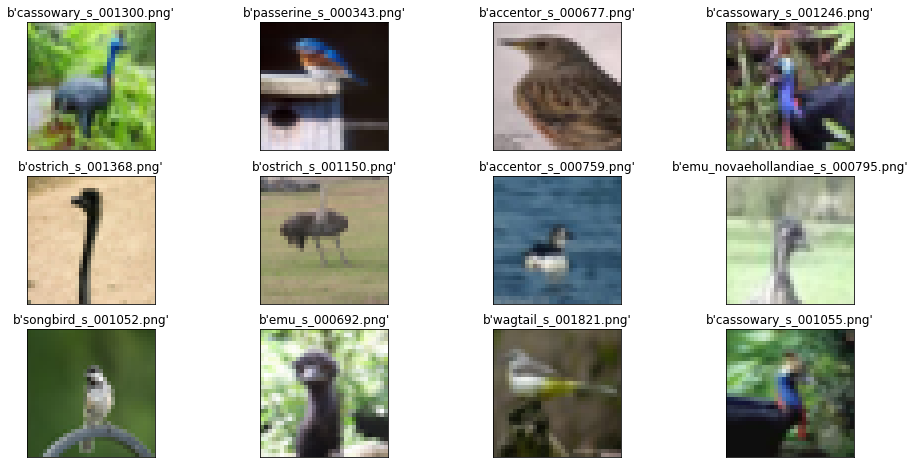

In [16]:
fig = plt.figure(figsize=(16, 8))
for i in range(12):
    ax = fig.add_subplot(3, 4, 1+i, xticks=[], yticks=[])
    ax.set_title(bird_train_files[i])
    plt.imshow(train_images[i])
plt.show()

### (c)

In [17]:
all_train_pixels = []
for i in range(len(train_images)):
    for j in range(len(train_images[i])):
        for k in range(len(train_images[i][j])):
            all_train_pixels.append(train_images[i][j][k])
all_train_pixels = np.array(all_train_pixels)
all_train_pixels[:10]

array([[164, 206,  84],
       [105, 140,  61],
       [118, 148, 101],
       [129, 158, 115],
       [134, 159, 119],
       [146, 170, 124],
       [166, 185, 150],
       [183, 195, 178],
       [199, 210, 193],
       [174, 190, 163]], dtype=uint8)

In [18]:
all_test_pixels = []
for i in range(len(test_images)):
    for j in range(len(test_images[i])):
        for k in range(len(test_images[i][j])):
            all_test_pixels.append(test_images[i][j][k])
all_test_pixels = np.array(all_test_pixels)
all_test_pixels[:10]

array([[100, 103,  74],
       [ 68,  91,  65],
       [116, 162, 109],
       [132, 181, 125],
       [131, 175, 127],
       [135, 176, 134],
       [130, 181, 123],
       [131, 190, 121],
       [128, 190, 120],
       [133, 194, 127]], dtype=uint8)

In [19]:
all_pixels = np.concatenate((all_train_pixels, all_test_pixels), axis=0)

### (d)

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(all_pixels)

In [22]:
print(kmeans.labels_[:100])
main_colors = []
for i in range(len(kmeans.cluster_centers_)):
    main_color_p = [int(round(rgb)) for rgb in kmeans.cluster_centers_[i]]
    main_colors.append(main_color_p)
print("Four main colors: ",main_colors)

[2 0 0 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0
 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 2 0 2 2 0 0 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 0 0 2 2 0 0 0 0 0 0 2 2 0]
Four main colors:  [[109, 109, 83], [207, 212, 211], [156, 156, 136], [49, 50, 39]]


In [190]:
main_color_train_images = []
main_color_train_categories = []
for i in range(len(train_images)):
    main_color_train_image = []
    main_color_train_category = []
    for j in range(len(train_images[i])):
        main_color_train_image_row = []
        main_color_train_category_row = []
        categories = kmeans.predict(train_images[i][j])
        for k in range(len(train_images[i][j])):
            category = categories[k]
            main_color_train_category_row.append(category)
            pixel = main_colors[category]
            main_color_train_image_row.append(pixel)
        main_color_train_image.append(main_color_train_image_row)
        main_color_train_category.append(main_color_train_category_row)
    main_color_train_images.append(main_color_train_image)
    main_color_train_categories.append(main_color_train_category)

In [309]:
main_color_train_categories = np.array(main_color_train_categories)
# main_color_train_categories = main_color_train_categories.reshape(5000,1,32,32)
main_color_train_categories.shape

(5000, 1, 32, 32)

In [24]:
main_color_train_images = np.array(main_color_train_images)
main_color_train_images.shape

(5000, 32, 32, 3)

In [186]:
main_color_test_images = []
main_color_test_categories = []
for i in range(len(test_images)):
    main_color_test_image = []
    main_color_test_category = []
    for j in range(len(test_images[i])):
        main_color_test_image_row = []
        main_color_test_category_row = []
        categories = kmeans.predict(test_images[i][j])
        for k in range(len(test_images[i][j])):
            category = categories[k]
            main_color_test_category_row.append(category)
            pixel = main_colors[category]
            main_color_test_image_row.append(pixel)
        main_color_test_image.append(main_color_test_image_row)
        main_color_test_category.append(main_color_test_category_row)
    main_color_test_images.append(main_color_test_image)
    main_color_test_categories.append(main_color_test_category)

In [310]:
main_color_test_categories = np.array(main_color_test_categories)
# main_color_test_categories = main_color_test_categories.reshape(1000,1,32,32)

In [26]:
main_color_test_images = np.array(main_color_test_images)
main_color_test_images.shape

(1000, 32, 32, 3)

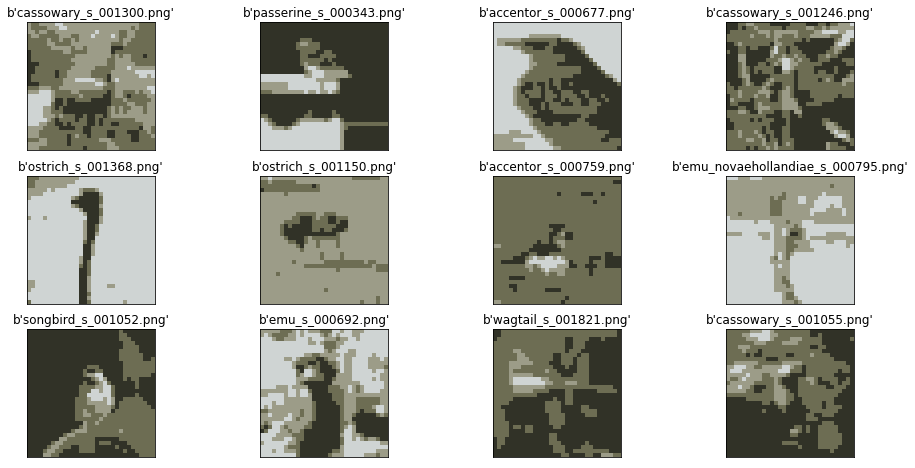

In [27]:
fig = plt.figure(figsize=(16, 8))
for i in range(12):
    ax = fig.add_subplot(3, 4, 1+i, xticks=[], yticks=[])
    ax.set_title(bird_train_files[i])
    plt.imshow(main_color_train_images[i])
plt.show()

### (e)

In [28]:
from skimage.color import rgb2gray

In [29]:
grayscale_test = []
for i in range(len(test_images)):
    grayscale_test.append(rgb2gray(test_images[i]))
grayscale_train = []
for i in range(len(train_images)):
    grayscale_train.append(rgb2gray(train_images[i]))

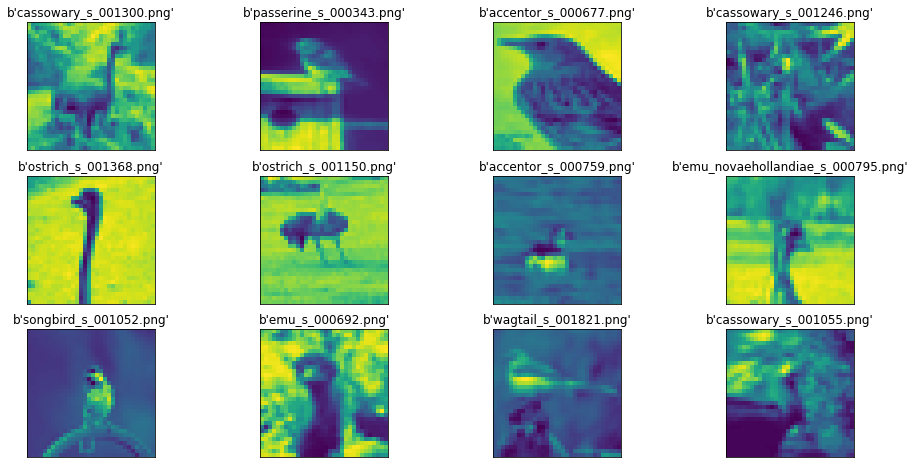

In [30]:
fig = plt.figure(figsize=(16, 8))
for i in range(12):
    ax = fig.add_subplot(3, 4, 1+i, xticks=[], yticks=[])
    ax.set_title(bird_train_files[i])
    plt.imshow(grayscale_train[i])
plt.show()

### (f)

In [127]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout

In [128]:
grayscale_train = np.array(grayscale_train)
grayscale_test = np.array(grayscale_test)

In [129]:
main_color_test_images.shape[1:]

(32, 32, 3)

In [331]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), strides=2, padding='same', input_shape=(1,32,32)))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(32, (5, 5), strides=2, padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(32))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(32))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [332]:
from keras.callbacks import ModelCheckpoint

filepath='cnn-epoch-5.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [333]:
grayscale_train_1 = grayscale_train.reshape(5000, 1, 32, 32)
grayscale_test_1 = grayscale_test.reshape(1000, 1, 32, 32)
grayscale_train_1[1]

array([[[0.02314863, 0.02314863, 0.02006039, ..., 0.05874824,
         0.05482667, 0.04306196],
        [0.0270702 , 0.0270702 , 0.0270702 , ..., 0.0626698 ,
         0.05874824, 0.05482667],
        [0.0270702 , 0.0270702 , 0.03099176, ..., 0.0626698 ,
         0.05874824, 0.05874824],
        ...,
        [0.84426039, 0.86691882, 0.79912824, ..., 0.09963843,
         0.09571686, 0.09963843],
        [0.85071176, 0.85292902, 0.82549294, ..., 0.10748157,
         0.10356   , 0.09963843],
        [0.82159412, 0.85490118, 0.83811373, ..., 0.11140314,
         0.10356   , 0.09571686]]])

In [336]:
from keras.utils import to_categorical
train_class_scheme = to_categorical(main_color_train_categories)
test_class_scheme = to_categorical(main_color_test_categories)
train_class_scheme_1 = train_class_scheme.reshape(5000,32,32,4)
test_class_scheme_1 = test_class_scheme.reshape(1000,32,32,4)
train_class_scheme_1[0]

array([[[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0.

In [335]:
cnn_model_info = cnn_model.fit(grayscale_train_1, train_class_scheme_1, batch_size=128, nb_epoch=5, validation_data=(grayscale_test_1, test_class_scheme_1), callbacks=callbacks_list)

/Users/chaochen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking target: expected dense_157 to have 2 dimensions, but got array with shape (5000, 32, 32, 4)